## Task 2 Data Exploration with Python

### a) Exploratory Data Analysis in Python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("GHG_Data.csv")

# Overview of the dataset
print(df.head())
print(df.info())
print(df.describe())


   Year  Ontario GHG ID                          Facility Owner  \
0  2010            1001                     ADM Agri-Industries   
1  2010            1002                 Air Products Canada Ltd   
2  2010            1003  Algonquin Power Energy From Waste Inc.   
3  2010            1005              ArcelorMittal Dofasco Inc.   
4  2010            1006        Atlantic Packaging Products Ltd.   

                             Facility Name Facility City  \
0                              ADM Windsor       Windsor   
1                Corunna Hydrogen Facility       Corunna   
2  Algonquin Power  Energy from Waste Inc.      Brampton   
3                         Dofasco Hamilton      Hamilton   
4                             111 Progress   Scarborough   

   Facility Primary NAICS Code  \
0                       311224   
1                       325120   
2                       562210   
3                       331110   
4                       322130   

   Carbon dioxide (CO2) from no

### b) Summary Statistics

In [15]:
#import piplite
#await piplite.install('seaborn')

In [14]:
import seaborn as sns


# Display the first few rows of the dataset
print(df.head())

# Get the basic statistics of numerical columns
print(df.describe())

# Get information about the data types and missing values
print(df.info())


   Year  Ontario GHG ID                          Facility Owner  \
0  2010            1001                     ADM Agri-Industries   
1  2010            1002                 Air Products Canada Ltd   
2  2010            1003  Algonquin Power Energy From Waste Inc.   
3  2010            1005              ArcelorMittal Dofasco Inc.   
4  2010            1006        Atlantic Packaging Products Ltd.   

                             Facility Name Facility City  \
0                              ADM Windsor       Windsor   
1                Corunna Hydrogen Facility       Corunna   
2  Algonquin Power  Energy from Waste Inc.      Brampton   
3                         Dofasco Hamilton      Hamilton   
4                             111 Progress   Scarborough   

   Facility Primary NAICS Code  \
0                       311224   
1                       325120   
2                       562210   
3                       331110   
4                       322130   

   Carbon dioxide (CO2) from no

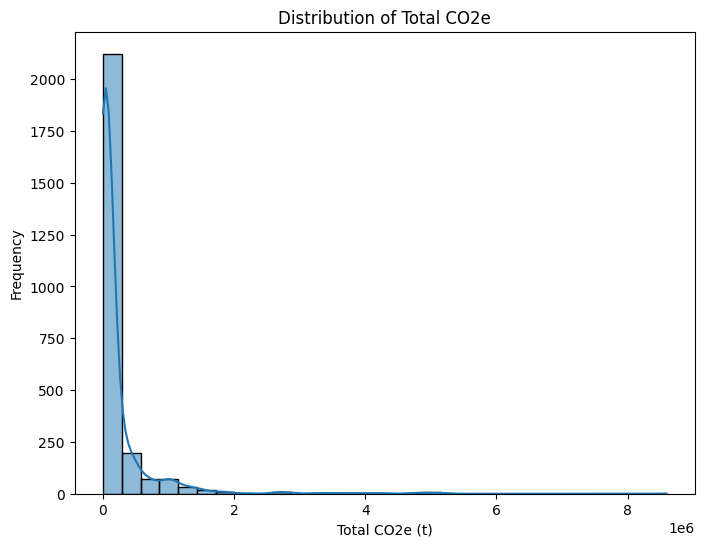

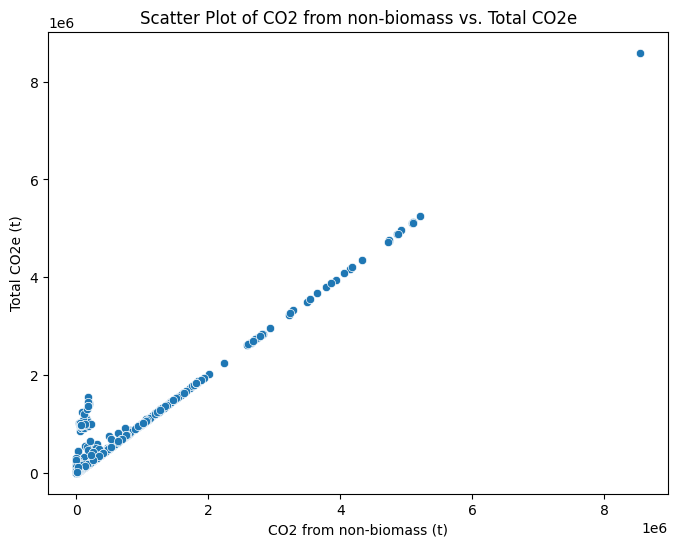

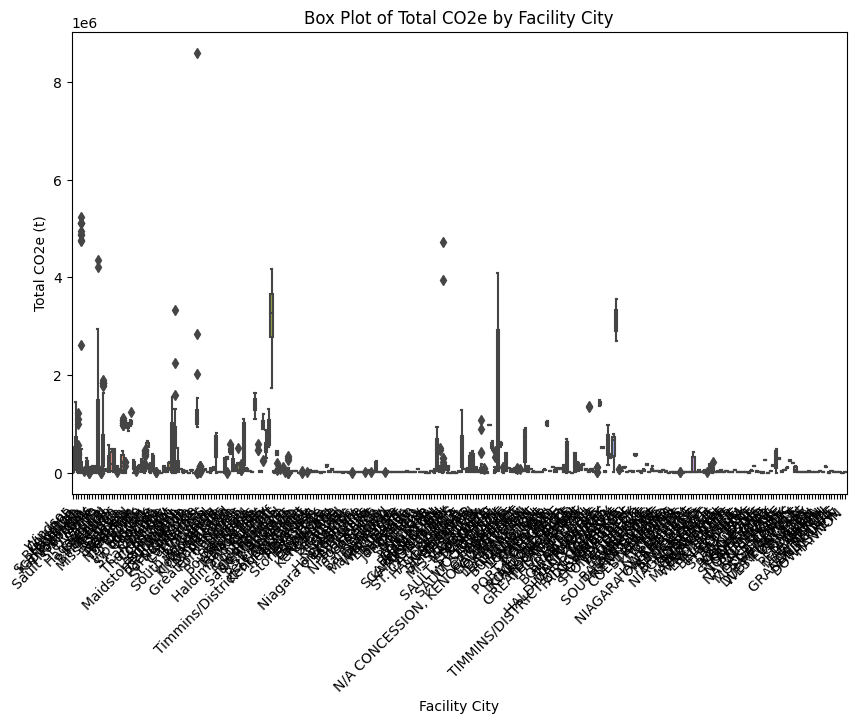

<ipython-input-16-3979ccc7ab16>:27: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


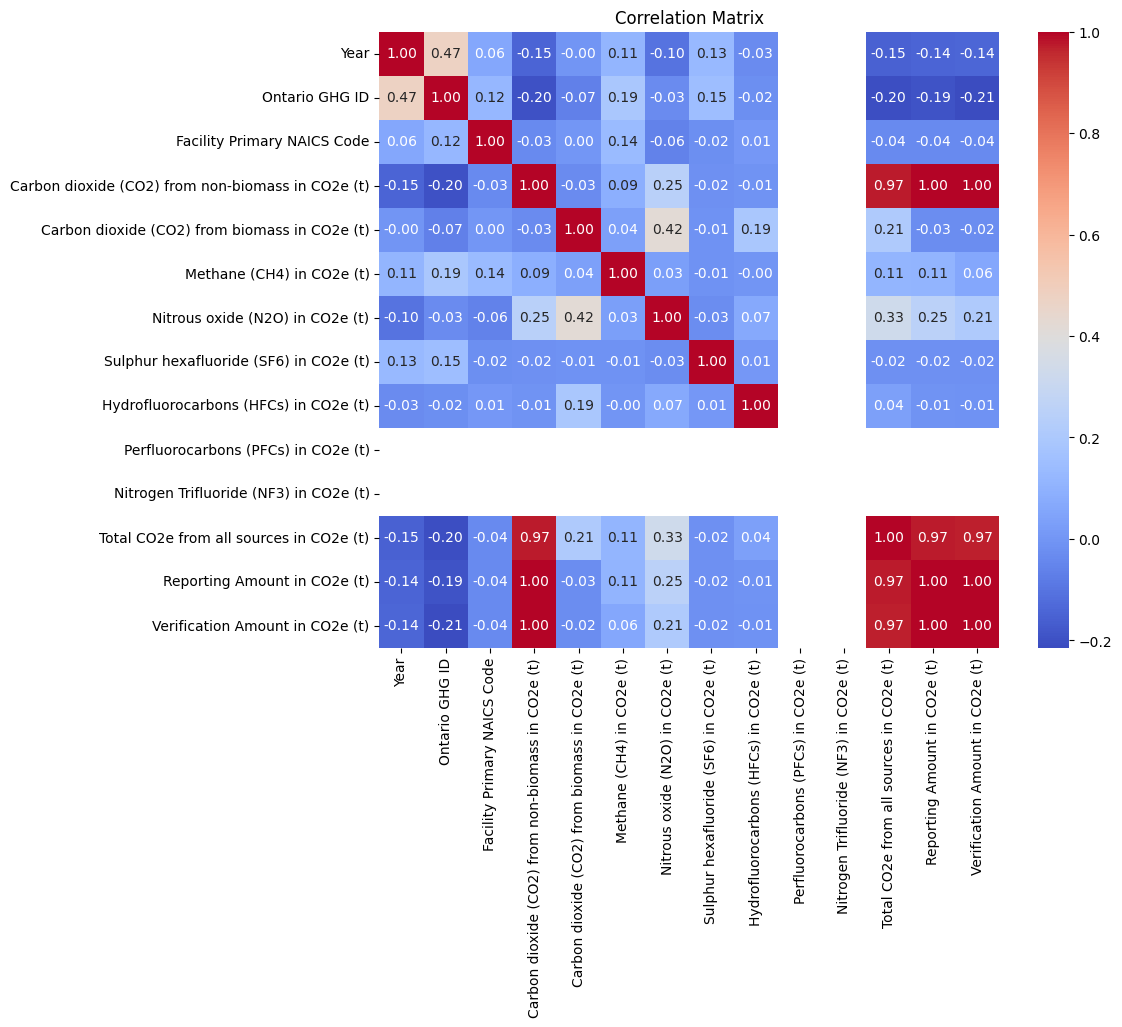

In [16]:
# Plot a histogram for the "Total CO2e from all sources in CO2e (t)" column
plt.figure(figsize=(8, 6))
sns.histplot(df['Total CO2e from all sources in CO2e (t)'], bins=30, kde=True)
plt.xlabel('Total CO2e (t)')
plt.ylabel('Frequency')
plt.title('Distribution of Total CO2e')
plt.show()

# Scatter plot between "Carbon dioxide (CO2) from non-biomass in CO2e (t)" and "Total CO2e"
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Carbon dioxide (CO2) from non-biomass in CO2e (t)', y='Total CO2e from all sources in CO2e (t)', data=df)
plt.xlabel('CO2 from non-biomass (t)')
plt.ylabel('Total CO2e (t)')
plt.title('Scatter Plot of CO2 from non-biomass vs. Total CO2e')
plt.show()

# Box plot for the "Facility City" vs. "Total CO2e"
plt.figure(figsize=(10, 6))
sns.boxplot(x='Facility City', y='Total CO2e from all sources in CO2e (t)', data=df)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Facility City')
plt.ylabel('Total CO2e (t)')
plt.title('Box Plot of Total CO2e by Facility City')
plt.show()

# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


## Task 3 Data Preprocessing in Python

### a) and b) Data Preprocessing 

### Handling Missing Values

In [22]:
# Check for missing values
print(df.isnull().sum())

# If you want to drop rows with any missing values
df.dropna(inplace=True)

# If you want to fill missing values with mean/median
# For example, filling missing values with mean for numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    df[col].fillna(df[col].mean(), inplace=True)


Year                                                 0
Ontario GHG ID                                       0
Facility Owner                                       0
Facility Name                                        0
Facility City                                        0
Facility Primary NAICS Code                          0
Carbon dioxide (CO2) from non-biomass in CO2e (t)    0
Carbon dioxide (CO2) from biomass in CO2e (t)        0
Methane (CH4) in CO2e (t)                            0
Nitrous oxide (N2O) in CO2e (t)                      0
Sulphur hexafluoride (SF6) in CO2e (t)               0
Hydrofluorocarbons (HFCs) in CO2e (t)                0
Perfluorocarbons (PFCs) in CO2e (t)                  0
Nitrogen Trifluoride (NF3) in CO2e (t)               0
Total CO2e from all sources in CO2e (t)              0
Reporting Amount in CO2e (t)                         0
Verification Amount in CO2e (t)                      0
Accredited Verification Body                         0
dtype: int

### Handling Catogorical Data

In [18]:
# Perform one-hot encoding for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


### Feature Scaling

In [19]:
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max scaling to numerical columns
scaler = MinMaxScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])


### Outlier Handling

In [20]:
# Outlier handling us
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = df[column].median()

# Call the function for each numerical column
for col in numerical_cols:
    handle_outliers_iqr(col)


### Data Splitting

In [21]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Total CO2e from all sources in CO2e (t)', axis=1)
y = df_encoded['Total CO2e from all sources in CO2e (t)']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Task 4 Implementing Missing Values 

### a) Two Machine learning Model

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Model:")
print("Root Mean Squared Error (RMSE):", rmse_rf)
print("R-squared (R2) Score:", r2_rf)


Random Forest Model:
Root Mean Squared Error (RMSE): 0.00529040819151716
R-squared (R2) Score: 0.9979629664088066


In [24]:
from sklearn.svm import SVR

# Initialize the Support Vector Regressor
svm_model = SVR(kernel='linear')

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
rmse_svm = mean_squared_error(y_test, y_pred_svm, squared=False)
r2_svm = r2_score(y_test, y_pred_svm)

print("\nSupport Vector Machine Model:")
print("Root Mean Squared Error (RMSE):", rmse_svm)
print("R-squared (R2) Score:", r2_svm)



Support Vector Machine Model:
Root Mean Squared Error (RMSE): 0.08977304389489155
R-squared (R2) Score: 0.413440965899481


### b) Evaluate and Compare 

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate Random Forest Model
y_pred_rf = rf_model.predict(X_test)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

# Evaluate Support Vector Machine (SVM) Model
y_pred_svm = svm_model.predict(X_test)
rmse_svm = mean_squared_error(y_test, y_pred_svm, squared=False)
r2_svm = r2_score(y_test, y_pred_svm)

# Display results
print("Random Forest Model:")
print("Root Mean Squared Error (RMSE):", rmse_rf)
print("R-squared (R2) Score:", r2_rf)

print("\nSupport Vector Machine Model:")
print("Root Mean Squared Error (RMSE):", rmse_svm)
print("R-squared (R2) Score:", r2_svm)


Random Forest Model:
Root Mean Squared Error (RMSE): 0.00529040819151716
R-squared (R2) Score: 0.9979629664088066

Support Vector Machine Model:
Root Mean Squared Error (RMSE): 0.08977304389489155
R-squared (R2) Score: 0.413440965899481


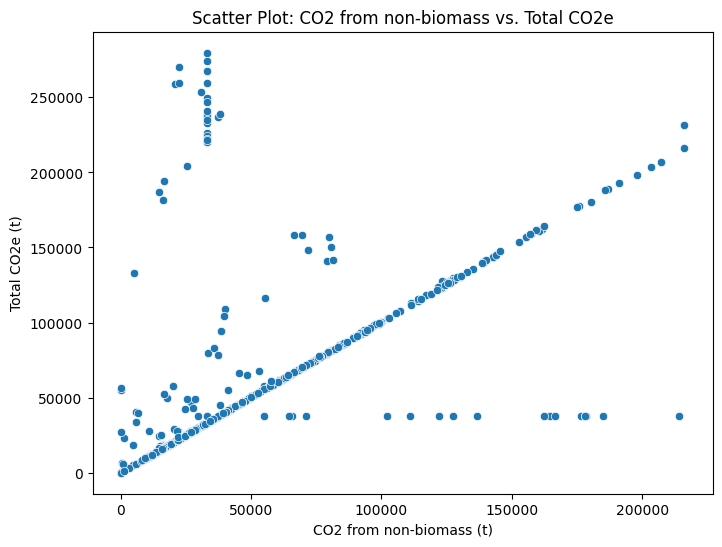

<ipython-input-26-08883a489399>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


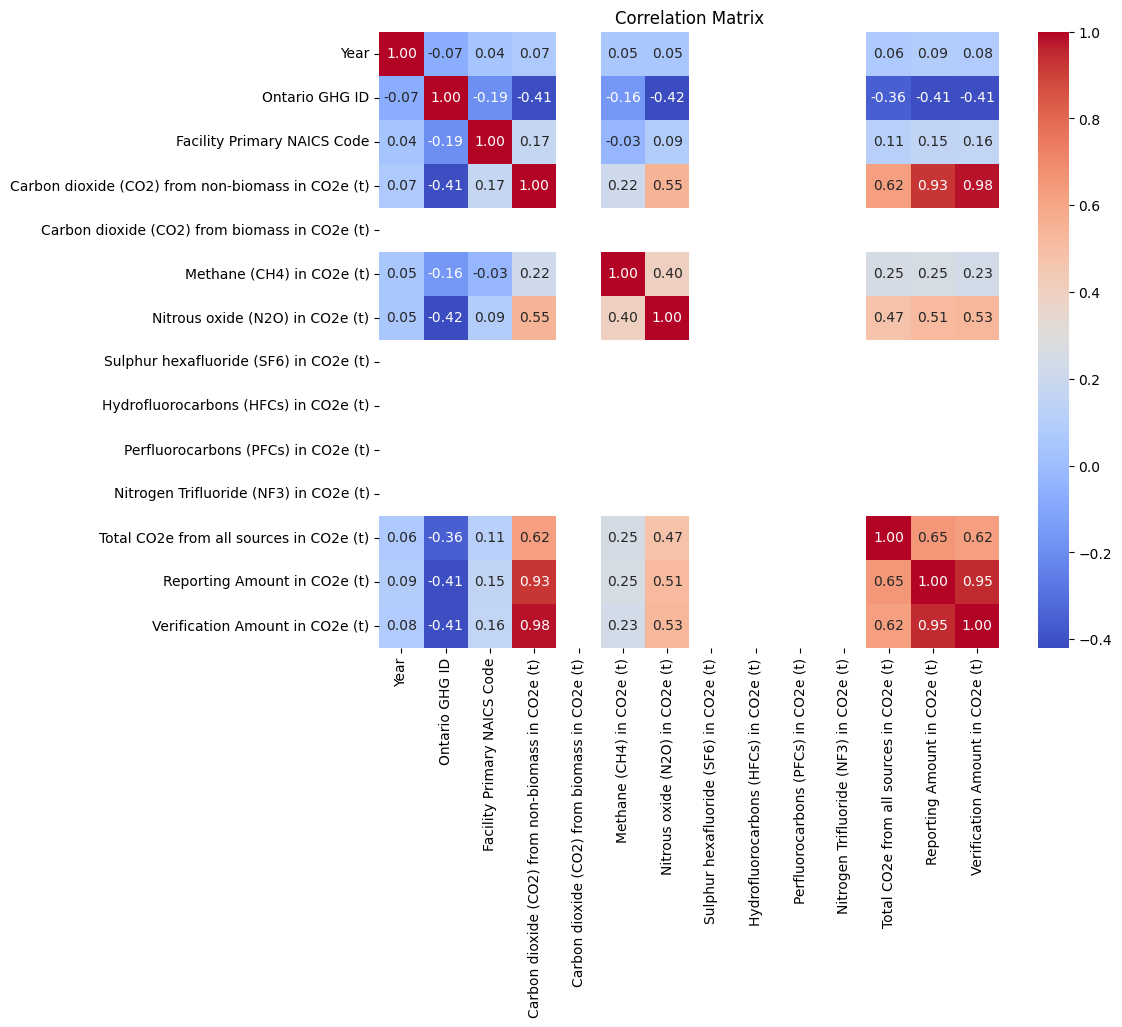

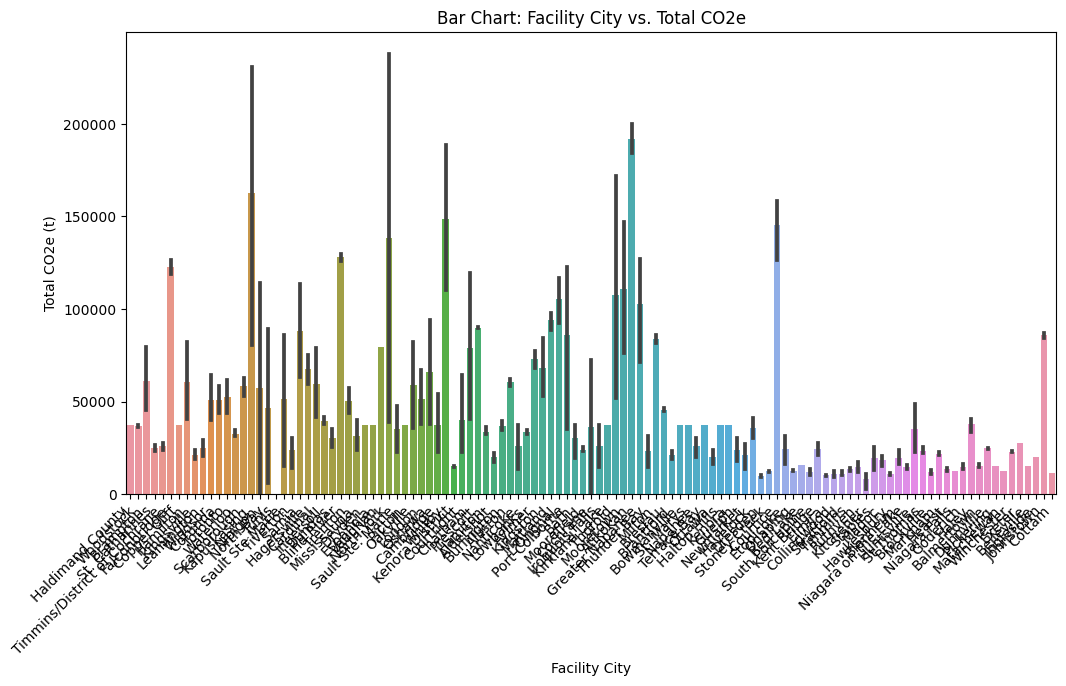

In [26]:
# Scatter plot: CO2 from non-biomass vs. Total CO2e
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Carbon dioxide (CO2) from non-biomass in CO2e (t)', y='Total CO2e from all sources in CO2e (t)', data=df)
plt.xlabel('CO2 from non-biomass (t)')
plt.ylabel('Total CO2e (t)')
plt.title('Scatter Plot: CO2 from non-biomass vs. Total CO2e')
plt.show()

# Heatmap: Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Bar chart: Facility City vs. Total CO2e
plt.figure(figsize=(12, 6))
sns.barplot(x='Facility City', y='Total CO2e from all sources in CO2e (t)', data=df)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Facility City')
plt.ylabel('Total CO2e (t)')
plt.title('Bar Chart: Facility City vs. Total CO2e')
plt.show()


In [29]:
import piplite
await piplite.install('plotly')

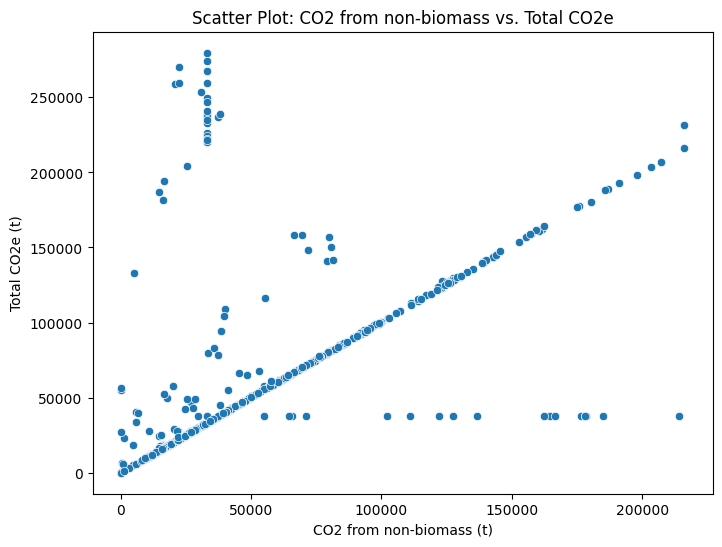

<ipython-input-30-be17f3c70eec>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


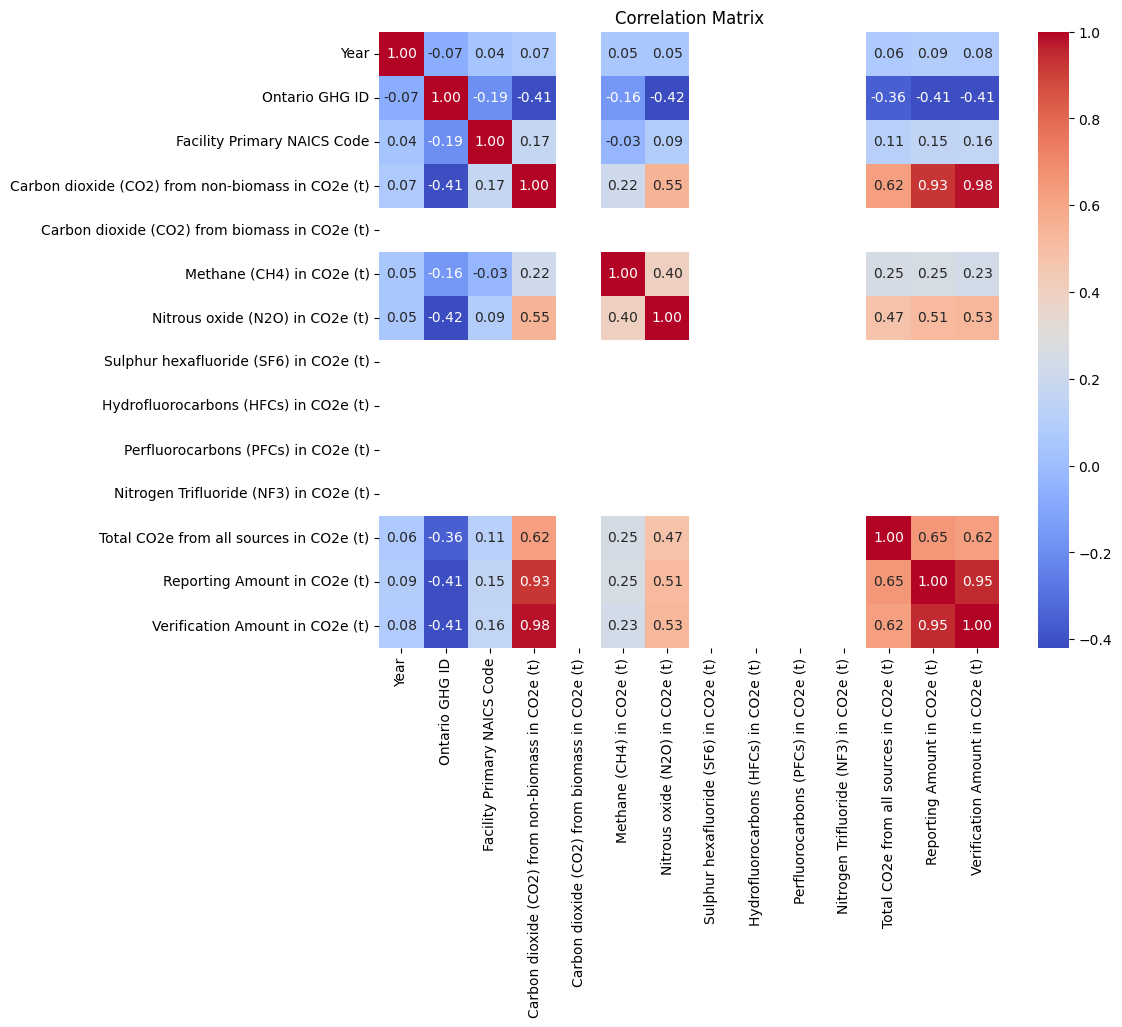

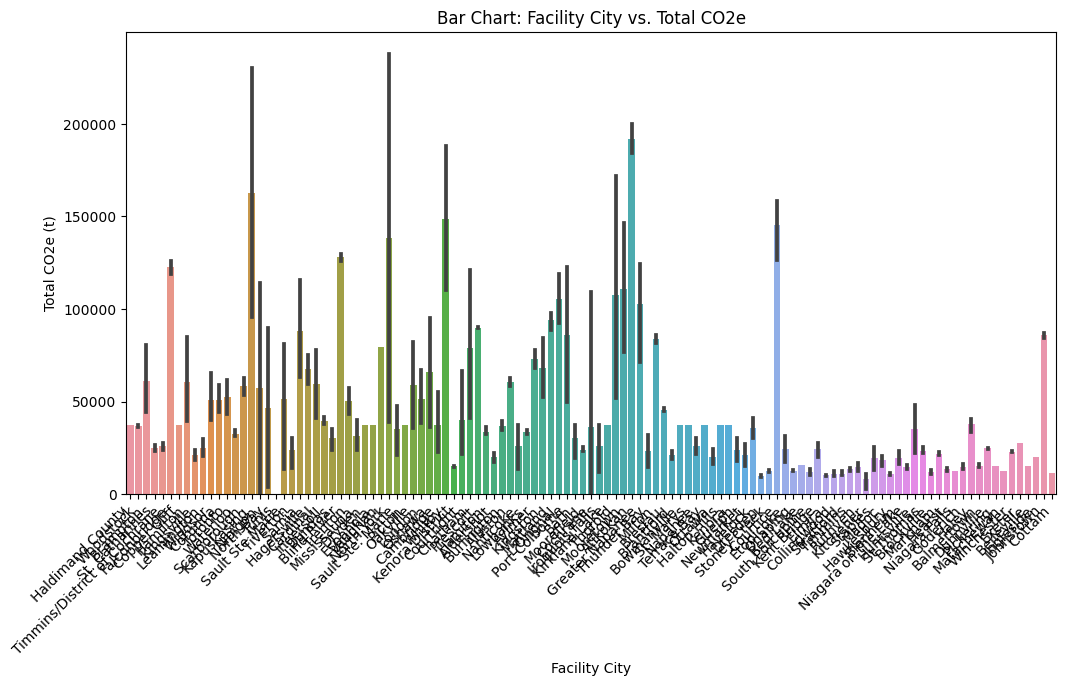

<class 'ValueError'>: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [30]:
import plotly.express as px

# 1. Scatter plot: CO2 from non-biomass vs. Total CO2e (with Seaborn)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Carbon dioxide (CO2) from non-biomass in CO2e (t)', y='Total CO2e from all sources in CO2e (t)', data=df)
plt.xlabel('CO2 from non-biomass (t)')
plt.ylabel('Total CO2e (t)')
plt.title('Scatter Plot: CO2 from non-biomass vs. Total CO2e')
plt.show()

# 2. Heatmap: Correlation matrix (with Seaborn)
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# 3. Bar chart: Facility City vs. Total CO2e (with Seaborn)
plt.figure(figsize=(12, 6))
sns.barplot(x='Facility City', y='Total CO2e from all sources in CO2e (t)', data=df)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Facility City')
plt.ylabel('Total CO2e (t)')
plt.title('Bar Chart: Facility City vs. Total CO2e')
plt.show()

# 4. Interactive bar chart: Facility City vs. Total CO2e (with Plotly)
fig = px.bar(df, x='Facility City', y='Total CO2e from all sources in CO2e (t)', title='Interactive Bar Chart: Facility City vs. Total CO2e')
fig.update_layout(xaxis_title='Facility City', yaxis_title='Total CO2e (t)')
fig.show()

# 5. Line chart: Year vs. Total CO2e (with Plotly)
fig = px.line(df, x='Year', y='Total CO2e from all sources in CO2e (t)', title='Line Chart: Year vs. Total CO2e')
fig.update_layout(xaxis_title='Year', yaxis_title='Total CO2e (t)')
fig.show()